# Exploring Discrete Compactness

In this notebook, we explore some discrete methods of computing district compactness, and compare their outputs.

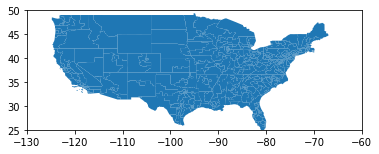

In [67]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

df_big = gpd.read_file('./cd2013/tl_rd13_us_cd113.shp')
df_small = gpd.read_file('./counties2013/cb_2013_us_county_500k.shp')
bad_geoids = ['02','15','69','72','60','78','66']
contig_us = df_big.iloc[[geoid[:2] not in bad_geoids for geoid in df_big['GEOID']]].copy()
contig_us.plot()
ax=plt.axis([-130,-60,25,50])
plt.show()

We start off by computing the area, perimeter, and Polsby-Popper score of every district in the LATLONG projection:

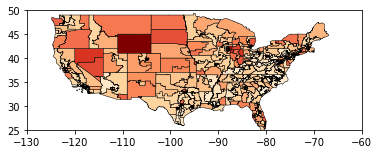

In [74]:
contig_us['area'] = contig_us.geometry.area
contig_us['perim'] = contig_us.geometry.boundary.length
contig_us['polsby'] = 4*np.pi*contig_us['area']/contig_us['perim']**2
contig_us.plot(column='polsby',cmap='OrRd', edgecolor='black', linewidth=0.5)
ax=plt.axis([-130,-60,25,50])
plt.show()

The first discrete compactness score will replace perimeter with the number of small units touching the shape boundary, and replace area with the number of small units touching the shape itself.

In [3]:
## TODO: map projections don't seem to work, or at least... some of them do.

#df_big = df_big.iloc[:5]
#df_big = df_big.to_crs({'init': 'epsg:102005'})
#df_big = df_big.to_crs({"init": "epsg:32614"})
#df_big.plot()
#plt.show()

In [69]:
cols = ['GEOID','dperim','darea']

discrete_data = pd.DataFrame(columns=cols)

for i, big_unit in contig_us.iterrows():
    discrete_perimeter = 0
    discrete_area = 0
    for i, small_unit in df_small.iterrows():
        if small_unit.geometry.intersects(big_unit.geometry):
            discrete_area += 1
        if small_unit.geometry.intersects(big_unit.geometry.boundary):
            discrete_perimeter +=1
    perimeter = big_unit.geometry.boundary.length
    area = big_unit.geometry.area
    discrete_data = discrete_data.append(pd.DataFrame([[big_unit['GEOID'],discrete_perimeter,discrete_area]], columns=cols))
contig_us = contig_us.merge(discrete_data, on='GEOID')

We can now play around with these discrete measures. Let's use the simple ratio of discrete perimeter to discrete area.

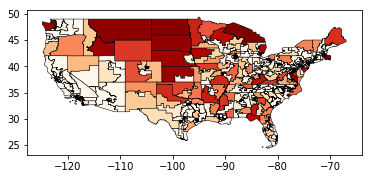

In [73]:
contig_us['dpolsby'] = contig_us['darea']/contig_us['dperim']
contig_us.plot(column='dpolsby',cmap='OrRd',edgecolor='black', linewidth=0.5)
tmp = contig_us.iloc[[contig_us.iloc[i]['dperim'] == 0 for i,d in contig_us.iterrows()]].copy()

Let's check which districts get better or worse!